# Predicción del precio de las casas con regresión Lineal Simple

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train = pd.read_csv('./train.csv')

In [2]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
train[['GrLivArea','SalePrice']].head(10)  #Superficie habitable por encima del nivel del suelo en pies cuadrados
                                           #Precio de venta

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000
5,1362,143000
6,1694,307000
7,2090,200000
8,1774,129900
9,1077,118000


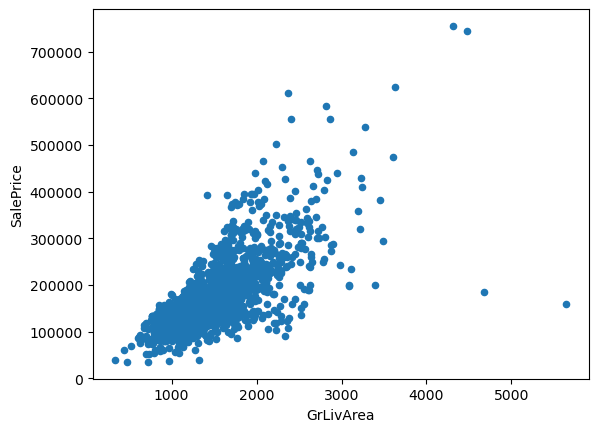

In [5]:
train.plot.scatter(x='GrLivArea',y='SalePrice')
plt.show()

In [6]:
# pintando una línea recta sobre los datos
# y = wx + b

In [7]:
# parametros de la recta
w = 120 #m
b = 0

# y = wx + b

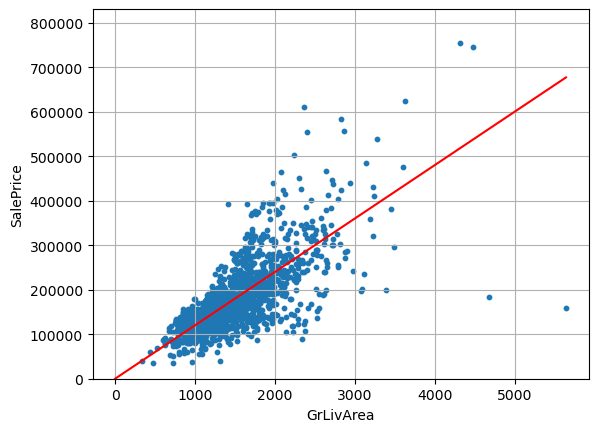

In [8]:
# puntos de la recta
x = np.linspace(0,train['GrLivArea'].max())
y = w*x+b

# grafica de la recta
train.plot.scatter(x='GrLivArea',y='SalePrice',s=10) #nombre de los ejes
plt.plot(x, y, '-r')
plt.ylim(0,train['SalePrice'].max()*1.1) #ajuste del eje y
plt.grid()
plt.show()

In [9]:
# si escogemos esos parametros para el modelo, ¿cual es el error?

In [10]:
# calculo de las predicciones
train['pred'] = train['GrLivArea']*w + b   #y=wx+b
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,205200
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,151440
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,214320
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,206040
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,263760


In [11]:
train[['GrLivArea','SalePrice','pred']].head()

,GrLivArea,SalePrice,pred
0,1710,208500,205200
1,1262,181500,151440
2,1786,223500,214320
3,1717,140000,206040
4,2198,250000,263760


In [12]:
# calculo de la funcion de error
train['diff'] = train['pred']-train['SalePrice'] #diferencia de las predicciones y valor real del eje y
train['cuad'] = train['diff']**2
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,diff,cuad
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,205200,-3300,10890000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,151440,-30060,903603600
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,214320,-9180,84272400
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,206040,66040,4361281600
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,263760,13760,189337600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,8,2007,WD,Normal,175000,197640,22640,512569600
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2010,WD,Normal,210000,248760,38760,1502337600
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,Shed,2500,5,2010,WD,Normal,266500,280800,14300,204490000
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,4,2010,WD,Normal,142125,129360,-12765,162945225


In [13]:
train[['GrLivArea','SalePrice','pred', 'diff', 'cuad']].head()

,GrLivArea,SalePrice,pred,diff,cuad
0,1710,208500,205200,-3300,10890000
1,1262,181500,151440,-30060,903603600
2,1786,223500,214320,-9180,84272400
3,1717,140000,206040,66040,4361281600
4,2198,250000,263760,13760,189337600


In [14]:
#Error cuadrático medio
train['cuad'].mean()

3186419782.6150684

In [15]:
# grid de la funcion de error basado en m, b=0
# q = np.linspace(1,100,10);
w = np.linspace(50,200,150)
grid_error = pd.DataFrame(w, columns=['w'])
grid_error

,w
0,50.000000
1,51.006711
2,52.013423
3,53.020134
4,54.026846
...,...
145,195.973154
146,196.979866
147,197.986577
148,198.993289


In [16]:
def sum_error(w, train):
    b=0
    train['pred'] = train['GrLivArea']*w+b
    train['diff'] = train['pred']-train['SalePrice']
    train['cuad'] = train['diff']**2
    return(train['cuad'].mean())
train['cuad'].mean()

3186419782.6150684

In [17]:
# a cada w se le asigna su error cuadrático medio. Es como si se ejecutara lo de arriba pero para distintas w.
grid_error['error'] = grid_error['w'].apply(lambda x: sum_error(x, train=train))
#grid_error['error'].min()
#grid_error['error']
#grid_error['w']
     
grid_error_menor = pd.DataFrame()
grid_error_menor['menorW'] = [ grid_error['w'] [grid_error['error'].argmin()]]
errorMinimo = float(grid_error_menor['menorW'])
errorMinimo

C:\Users\pc\AppData\Local\Temp\ipykernel_6968\2992021314.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  errorMinimo = float(grid_error_menor['menorW'])


118.45637583892618

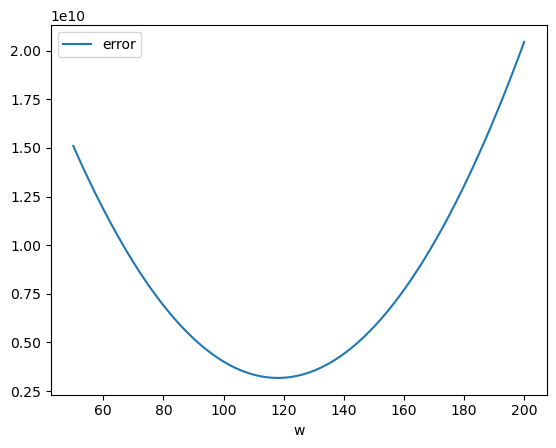

In [18]:
grid_error.plot(x='w',y='error')
plt.show()

# Implementando la librería Sklearn

In [19]:
import numpy as np

# Crear una matriz unidimensional
array_unidimensional = np.array([1, 2, 3, 4, 5, 6])

# Utilizar reshape para convertir la matriz unidimensional en una matriz bidimensional (3 filas x 2 columnas)
array_bidimensional = array_unidimensional.reshape((3, 2))

# Imprimir las matrices originales y la transformada
print("Matriz Unidimensional:")
print(array_unidimensional)
print("\nMatriz Bidimensional:")
print(array_bidimensional)

Matriz Unidimensional:
[1 2 3 4 5 6]

Matriz Bidimensional:
[[1 2]
 [3 4]
 [5 6]]


In [20]:
import numpy as np

# Crear una matriz unidimensional
array_unidimensional = np.array([1, 2, 3, 4, 5, 6])

# Utilizar reshape para convertir la matriz unidimensional en una matriz bidimensional con una columna
array_bidimensional = array_unidimensional.reshape((-1, 1))

# Imprimir las matrices originales y la transformada
print("Matriz Unidimensional:")
print(array_unidimensional)
print("\nMatriz Bidimensional:")
print(array_bidimensional)

Matriz Unidimensional:
[1 2 3 4 5 6]

Matriz Bidimensional:
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [21]:
# usando sklear para saber los valores optimos
from sklearn.linear_model import LinearRegression

# definiendo input y output

X_train = np.array(train['GrLivArea']).reshape((-1, 1)) #Primer variable (entrada)
Y_train = np.array(train['SalePrice'])                  #Segunda variable (salida)

# creando modelo
model = LinearRegression(fit_intercept=False) #la línea de regresión pasa por el origen (0,0).
model.fit(X_train, Y_train)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

intercepto (b): 0.0
pendiente (w): [118.06909986]


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir datos de entrenamiento
X_train = np.array(train['GrLivArea']).reshape((-1, 1))  # Variable de entrada
Y_train = np.array(train['SalePrice'])  # Variable de salida

# Crear y ajustar el modelo de regresión lineal
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

# Imprimir parámetros del modelo
print(f"Intercepto (b): {model.intercept_}")
print(f"Pendiente (w): {model.coef_}")

# Realizar predicciones
predictions = model.predict(X_train)

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(Y_train, predictions)
print(f"Error Cuadrático Medio (MSE): {mse}")

Intercepto (b): 0.0
Pendiente (w): [118.06909986]
Error Cuadrático Medio (MSE): 3176828273.3656716


Error Cuadrático Medio (MSE) en prueba: 3323104718.6597733
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     1093.
Date:                Wed, 31 Jan 2024   Prob (F-statistic):          1.08e-169
Time:                        20:16:32   Log-Likelihood:                -14416.
No. Observations:                1168   AIC:                         2.884e+04
Df Residuals:                    1166   BIC:                         2.885e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

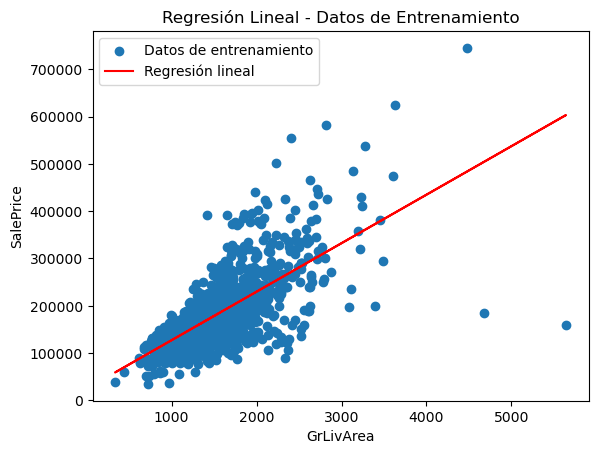

In [23]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supongamos que ya tienes un DataFrame llamado 'train' con las columnas 'GrLivArea' y 'SalePrice'

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(train[['GrLivArea']], train['SalePrice'], test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión lineal con scikit-learn
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
predictions_test = model.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) en el conjunto de prueba
mse_test = mean_squared_error(Y_test, predictions_test)
print(f"Error Cuadrático Medio (MSE) en prueba: {mse_test}")

# Añadir una columna de unos para el término constante
X_train_sm = sm.add_constant(X_train)

# Crear y ajustar el modelo de regresión lineal con statsmodels
model_sm = sm.OLS(Y_train, X_train_sm).fit()

# Imprimir un resumen completo del modelo con statsmodels
print(model_sm.summary())

# Visualizar la regresión en el conjunto de entrenamiento
plt.scatter(X_train, Y_train, label='Datos de entrenamiento')
plt.plot(X_train, model_sm.predict(sm.add_constant(X_train)), color='red', label='Regresión lineal')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Regresión Lineal - Datos de Entrenamiento')
plt.legend()
plt.show()

# Del resultado:
#const = intercepto
# GrLivArea = pendiente

# R squared (coheficiente de determinación) < 0.5 mal ajuste, >= 0.5 y <0.7 aceptable, >=0.7 y <0.9 buen ajuste, >0.9 y <1 es muy buen ajuste.

# Regresión Lineal Múltiple

<img src="images/4.jpeg" alt="Texto alternativo" width="300">

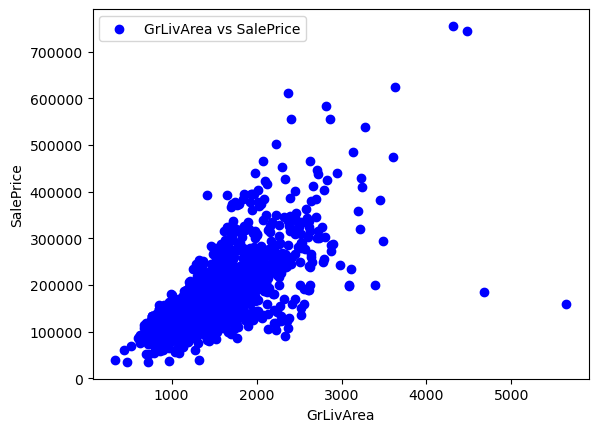

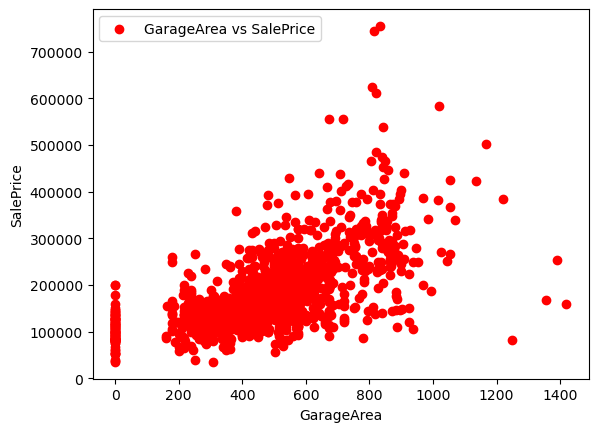

In [24]:
import matplotlib.pyplot as plt

x1 = train[['GrLivArea']]
x2 = train[['GarageArea']]
y = train['SalePrice']

plt.scatter(x1, y, color='blue', label='GrLivArea vs SalePrice')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

plt.scatter(x2, y, color='red', label='GarageArea vs SalePrice')
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

plt.show()

In [25]:
# Primero se debe calcular B0, para eso:

x1 = train[['GrLivArea']]
x2 = train[['GarageArea']]
y = train['SalePrice']

# Calcular las medias
mean_y = np.mean(y)
mean_x1 = np.mean(x1)
mean_x2 = np.mean(x2)

print(f"Media de Y (SalePrice): {int(mean_y)}")
print(f"Media de X1 (GrLivArea): {int(mean_x1)}")
print(f"Media de X2 (GarageArea): {int(mean_x2)}")

Media de Y (SalePrice): 180921
Media de X1 (GrLivArea): 1515
Media de X2 (GarageArea): 472


In [26]:
beta1 = 102 #pendiente de GrLivArea
beta2 = 228 #pendiente de GarageArea (Este se debe calcular arriba)

# Calcular el intercepto B0
#B0 = media_y - beta1*media_x1 - beta2*media_x2
intercepto = 180921 - beta1 * 1515 - beta2 * 472

print(f"Intercepto (beta0): {intercepto}")

Intercepto (beta0): -81225


In [27]:
dfm = pd.DataFrame()

ysalida = -81225 + 102*train['GrLivArea'] + 228*train['GarageArea']

dfm['y_multiple'] = ysalida

dfm

,y_multiple
0,218139
1,152379
2,239571
3,240285
4,333579
...,...
1455,191649
1456,244221
1457,214911
1458,83451


In [28]:
dfm['PrecioCasa'] = train['SalePrice']
dfm

,y_multiple,PrecioCasa
0,218139,208500
1,152379,181500
2,239571,223500
3,240285,140000
4,333579,250000
...,...,...
1455,191649,175000
1456,244221,210000
1457,214911,266500
1458,83451,142125


In [29]:
dfm['Area Casa'] = train['GrLivArea']
dfm['Area Garage'] = train['GarageArea']
dfm

,y_multiple,PrecioCasa,Area Casa,Area Garage
0,218139,208500,1710,548
1,152379,181500,1262,460
2,239571,223500,1786,608
3,240285,140000,1717,642
4,333579,250000,2198,836
...,...,...,...,...
1455,191649,175000,1647,460
1456,244221,210000,2073,500
1457,214911,266500,2340,252
1458,83451,142125,1078,240


In [30]:
# ysalida = -81225 + 102*x1 + 228*x2
# y_multiple

In [31]:
dfm['diff'] = dfm['y_multiple'] - dfm['PrecioCasa']
dfm

,y_multiple,PrecioCasa,Area Casa,Area Garage,diff
0,218139,208500,1710,548,9639
1,152379,181500,1262,460,-29121
2,239571,223500,1786,608,16071
3,240285,140000,1717,642,100285
4,333579,250000,2198,836,83579
...,...,...,...,...,...
1455,191649,175000,1647,460,16649
1456,244221,210000,2073,500,34221
1457,214911,266500,2340,252,-51589
1458,83451,142125,1078,240,-58674


In [32]:
dfm['cuad'] = dfm['diff']**2
dfm

,y_multiple,PrecioCasa,Area Casa,Area Garage,diff,cuad
0,218139,208500,1710,548,9639,92910321
1,152379,181500,1262,460,-29121,848032641
2,239571,223500,1786,608,16071,258277041
3,240285,140000,1717,642,100285,10057081225
4,333579,250000,2198,836,83579,6985449241
...,...,...,...,...,...,...
1455,191649,175000,1647,460,16649,277189201
1456,244221,210000,2073,500,34221,1171076841
1457,214911,266500,2340,252,-51589,2661424921
1458,83451,142125,1078,240,-58674,3442638276


In [33]:
dfm['cuad'].mean()/1000000

3145.6782974917805

In [34]:
ecm1 = int(3186419782.6150684) #error cuadratico medio 1 = ecm de area casa.
ecm2 = int(3145678297.4917808) # error cuadratico medio 2 = ecm la regresión multiple (area casa y area garage).
error =  ecm1 - ecm2
error

40741485

In [35]:
#Implementando librerías

import statsmodels.api as sm

X = train[['GrLivArea', 'GarageArea',]]
y = train['SalePrice']

# Añadir la constante al conjunto de características (intercepto)
X = sm.add_constant(X)

# Crear y ajustar el modelo
model = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     1143.
Date:                Wed, 31 Jan 2024   Prob (F-statistic):          2.90e-299
Time:                        20:18:05   Log-Likelihood:                -17855.
No. Observations:                1460   AIC:                         3.572e+04
Df Residuals:                    1457   BIC:                         3.573e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6915.3807   4159.871     -1.662      0.0

# Ejercicio en clase

- Aplicar la regresión lineal múltiple para tres variables. Implementar el algoritmo y la librería.
- Realizar la regresión lineal múltiple para la base de datos de Esperanza de vida (Datos.csv)